## Lab2 - TSP Fast solution

https://www.wolframcloud.com/obj/giovanni.squillero/Published/Lab2-tsp.nb

In [1]:
from itertools import combinations
import pandas as pd
import numpy as np
import geopy.distance
import matplotlib.pyplot as plt
import random

In [2]:
CITIES = pd.read_csv('cities/russia.csv', header=None, names=['name', 'lat', 'lon'])

In [3]:
# Save for each couple save -> ( distance, index of compared city )
DIST_MATRIX = np.zeros((len(CITIES), len(CITIES)), dtype=tuple)
for c1, c2 in combinations(CITIES.itertuples(), 2):
    DIST_MATRIX[c1.Index, c2.Index] = (geopy.distance.geodesic(
        (c1.lat, c1.lon), (c2.lat, c2.lon)
    ).km, c2.Index)
    DIST_MATRIX[c2.Index, c1.Index] = (geopy.distance.geodesic(
        (c1.lat, c1.lon), (c2.lat, c2.lon)
    ).km, c1.Index)

## Helper Functions

In [4]:
def cost(path):
    circular_path = path + [path[0]]
    tot_dist = 0
    for i in range(len(circular_path)-1):
        tot_dist += DIST_MATRIX[circular_path[i],circular_path[i+1]][0]
    return tot_dist


In [5]:
def print_path(path):
    circular_path = path + [path[0]]
    print("Path:")
    for i in range(len(circular_path)-1):
        print(f"{CITIES.at[circular_path[i],'name']} -> {CITIES.at[circular_path[i+1],'name']} ({DIST_MATRIX[circular_path[i],circular_path[i+1]][0]:.2f}km)")

    print(f"\nNumber of steps: {len(circular_path)-1} , Total lenght: {cost(path):.2f} km")


In [6]:
def visualize_path(path):
    circular_path = path + [path[0]]
    x_coordinates = [CITIES.at[i,'lon'] for i in circular_path]
    y_coordinates = [CITIES.at[i,'lat'] for i in circular_path]

    plt.figure()
    plt.title("Path Quick Resolution")
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.axis('equal')
    plt.plot(x_coordinates,y_coordinates,marker='o', linestyle='-', color='b')
    plt.show()

# Fast Resolution

Computing the closest city starting from the first

In [7]:
def compute_fast_min(start):
    # Search min algorithm
    visited = np.full(len(CITIES), False)
    curr_city_i = start
    visited[curr_city_i] = True
    path = list()
    path.append(curr_city_i)

    while not np.all(visited):

        # Find the city with minimum distance and take the correspondig index to make it the next city
        next_city_tup= np.min(DIST_MATRIX[curr_city_i,np.logical_not(visited)])
        curr_city_i = next_city_tup[1]

        path.append(curr_city_i)
        visited[curr_city_i] = True
    
    return path


Path:
Magadan -> Petropavlovsk‐Kamchatskiy (875.16km)
Petropavlovsk‐Kamchatskiy -> Yuzhno‐Sakhalinsk (1321.54km)
Yuzhno‐Sakhalinsk -> Komsomolsk‐na‐Amure (582.17km)
Komsomolsk‐na‐Amure -> Khabarovsk (274.21km)
Khabarovsk -> Ussuriysk (566.90km)
Ussuriysk -> Artyom (50.78km)
Artyom -> Vladivostok (34.21km)
Vladivostok -> Nakhodka (87.36km)
Nakhodka -> Blagoveshchensk (922.98km)
Blagoveshchensk -> Chita (1002.31km)
Chita -> Ulan‐Ude (402.25km)
Ulan‐Ude -> Irkutsk (238.28km)
Irkutsk -> Angarsk (34.88km)
Angarsk -> Bratsk (439.00km)
Bratsk -> Krasnoyarsk (538.01km)
Krasnoyarsk -> Achinsk (161.71km)
Achinsk -> Abakan (291.13km)
Abakan -> Novokuznetsk (285.72km)
Novokuznetsk -> Prokopyevsk (30.63km)
Prokopyevsk -> Leninsk‐Kuznetskiy (91.87km)
Leninsk‐Kuznetskiy -> Kemerovo (74.76km)
Kemerovo -> Tomsk (147.60km)
Tomsk -> Seversk (14.97km)
Seversk -> Novosibirsk (211.49km)
Novosibirsk -> Barnaul (194.50km)
Barnaul -> Biysk (132.82km)
Biysk -> Rubtsovsk (294.26km)
Rubtsovsk -> Omsk (647.47km)
O

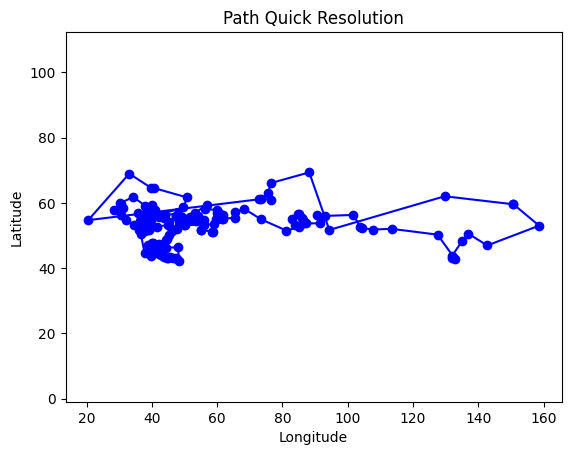

In [8]:
solution = compute_fast_min(0)

for i in range(1,len(CITIES)):
    new_path = compute_fast_min(i)
    if cost(new_path) < cost(solution):
        solution = new_path

print_path(solution)

visualize_path(solution)
